Google and Aravind Eye Hospital work: https://venturebeat.com/2019/02/25/google-works-with-aravind-eye-hospital-to-deploy-ai-that-can-detect-eye-disease/

Data Source: https://www.kaggle.com/c/diabetic-retinopathy-detection

Publication: https://jamanetwork.com/journals/jama/fullarticle/2588763

Original paper worked on 494661 images, here we are working on small small dataset. Total 3662 images.

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import os

In [7]:
os.chdir(r"/content")

In [8]:
pwd

'/content'

In [9]:
os.chdir(r"/content/drive/MyDrive/AI_DataSet/Dibetic_Retinopathy")

In [10]:
# Unzip the data
# !unzip /content/drive/MyDrive/AI_DataSet/Dibetic_Retinopathy/train.zip
# Use this command to view your files
!ls

my_dir_random_search  retina_weights.hdf5  train.csv
My_weights.hdf5       train		   train.zip


In [11]:
# Import the necessary packages

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import os
import matplotlib.pyplot as plt
import PIL
import seaborn as sns
import plotly
import plotly.graph_objs as go
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from plotly.offline import iplot, init_notebook_mode
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from IPython.display import display
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler


In [ ]:
# from jupyterthemes import jtplot
# jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 
# setting the style of the notebook to be monokai theme  
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them. 

In [12]:
os.listdir('./train')

['Proliferate_DR', 'Severe', 'Mild', 'Moderate', 'No_DR']

In [13]:
os.listdir(os.path.join('train', 'No_DR'))

['757e39293591.png',
 '7a6495a39d87.png',
 '8329e80c10ac.png',
 '77acc2cafee1.png',
 '81d79d53ed7b.png',
 '7fc3a8bb40de.png',
 '6fe4751a3b42.png',
 '7f6690fa390a.png',
 '79cbae28d8b2.png',
 '7831ce1d895e.png',
 '7b9d519cbd66.png',
 '763ad1236efe.png',
 '81371b0c01ad.png',
 '789f0ec1eab8.png',
 '7ce671f952be.png',
 '7ba6b23c4b46.png',
 '78937523f7a8.png',
 '77a1f1398fdb.png',
 '7f2123bc89a3.png',
 '7a42443ed106.png',
 '7ddcfcea7369.png',
 '75ed83dbccce.png',
 '7569ac24762e.png',
 '7a12f49e29df.png',
 '7ad0c4975890.png',
 '780f9daaa24b.png',
 '7da558d92100.png',
 '80c67efc8101.png',
 '7aabd768abff.png',
 '7e77b61e1639.png',
 '6fbaaf8eb67a.png',
 '72c31aa48e2c.png',
 '7a9f45fdf29b.png',
 '7f43becd3e83.png',
 '80b5697f2a5e.png',
 '810ed108f5b7.png',
 '7bc00e58d419.png',
 '735836b1ffa6.png',
 '8185ce1cdcef.png',
 '7be1b9aa78aa.png',
 '72606afaf3da.png',
 '780be525036d.png',
 '73d40ce06a67.png',
 '7a39c91416e2.png',
 '7c3747c0b2c3.png',
 '80e6e425f966.png',
 '75238d945315.png',
 '76f3473df8a

In [14]:
# Check the number of images in the dataset
train = []
label = []

# os.listdir returns the list of files in the folder, in this case image class names
for i in os.listdir('./train'):
    train_class = os.listdir(os.path.join('train', i))
    for j in train_class:
        img = os.path.join('train', i, j)
        train.append(img)
        label.append(i) #Folder name as a target label of image

print('Number of train images = {}'.format(len(train)))

Number of train images = 3662


In [15]:
train

['train/Proliferate_DR/0bf37ca3156a.png',
 'train/Proliferate_DR/1638404f385c.png',
 'train/Proliferate_DR/1a7e3356b39c.png',
 'train/Proliferate_DR/07122e268a1d.png',
 'train/Proliferate_DR/0e0fc1d9810c.png',
 'train/Proliferate_DR/0e82bcacc475.png',
 'train/Proliferate_DR/0ada12c0e78f.png',
 'train/Proliferate_DR/10fca1abf338.png',
 'train/Proliferate_DR/001639a390f0.png',
 'train/Proliferate_DR/15e96e848b46.png',
 'train/Proliferate_DR/0083ee8054ee.png',
 'train/Proliferate_DR/034cb07a550f.png',
 'train/Proliferate_DR/187f6ccda87a.png',
 'train/Proliferate_DR/03a7f4a5786f.png',
 'train/Proliferate_DR/080ee76c958c.png',
 'train/Proliferate_DR/0981195eb9fb.png',
 'train/Proliferate_DR/02685f13cefd.png',
 'train/Proliferate_DR/0318598cfd16.png',
 'train/Proliferate_DR/0ceb222f6629.png',
 'train/Proliferate_DR/080f66eedfb9.png',
 'train/Proliferate_DR/1a90fad9ffa2.png',
 'train/Proliferate_DR/11242a67122d.png',
 'train/Proliferate_DR/02dda30d3acf.png',
 'train/Proliferate_DR/1bf30c84bba

In [16]:
label

['Proliferate_DR',
 'Proliferate_DR',
 'Proliferate_DR',
 'Proliferate_DR',
 'Proliferate_DR',
 'Proliferate_DR',
 'Proliferate_DR',
 'Proliferate_DR',
 'Proliferate_DR',
 'Proliferate_DR',
 'Proliferate_DR',
 'Proliferate_DR',
 'Proliferate_DR',
 'Proliferate_DR',
 'Proliferate_DR',
 'Proliferate_DR',
 'Proliferate_DR',
 'Proliferate_DR',
 'Proliferate_DR',
 'Proliferate_DR',
 'Proliferate_DR',
 'Proliferate_DR',
 'Proliferate_DR',
 'Proliferate_DR',
 'Proliferate_DR',
 'Proliferate_DR',
 'Proliferate_DR',
 'Proliferate_DR',
 'Proliferate_DR',
 'Proliferate_DR',
 'Proliferate_DR',
 'Proliferate_DR',
 'Proliferate_DR',
 'Proliferate_DR',
 'Proliferate_DR',
 'Proliferate_DR',
 'Proliferate_DR',
 'Proliferate_DR',
 'Proliferate_DR',
 'Proliferate_DR',
 'Proliferate_DR',
 'Proliferate_DR',
 'Proliferate_DR',
 'Proliferate_DR',
 'Proliferate_DR',
 'Proliferate_DR',
 'Proliferate_DR',
 'Proliferate_DR',
 'Proliferate_DR',
 'Proliferate_DR',
 'Proliferate_DR',
 'Proliferate_DR',
 'Proliferat

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



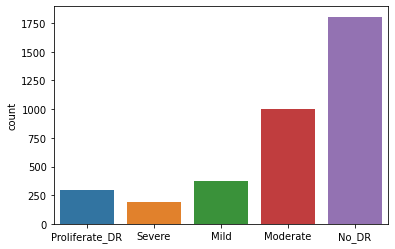

In [17]:
sns.countplot(label)

# PERFORM DATA EXPLORATION AND DATA VISUALIZATION

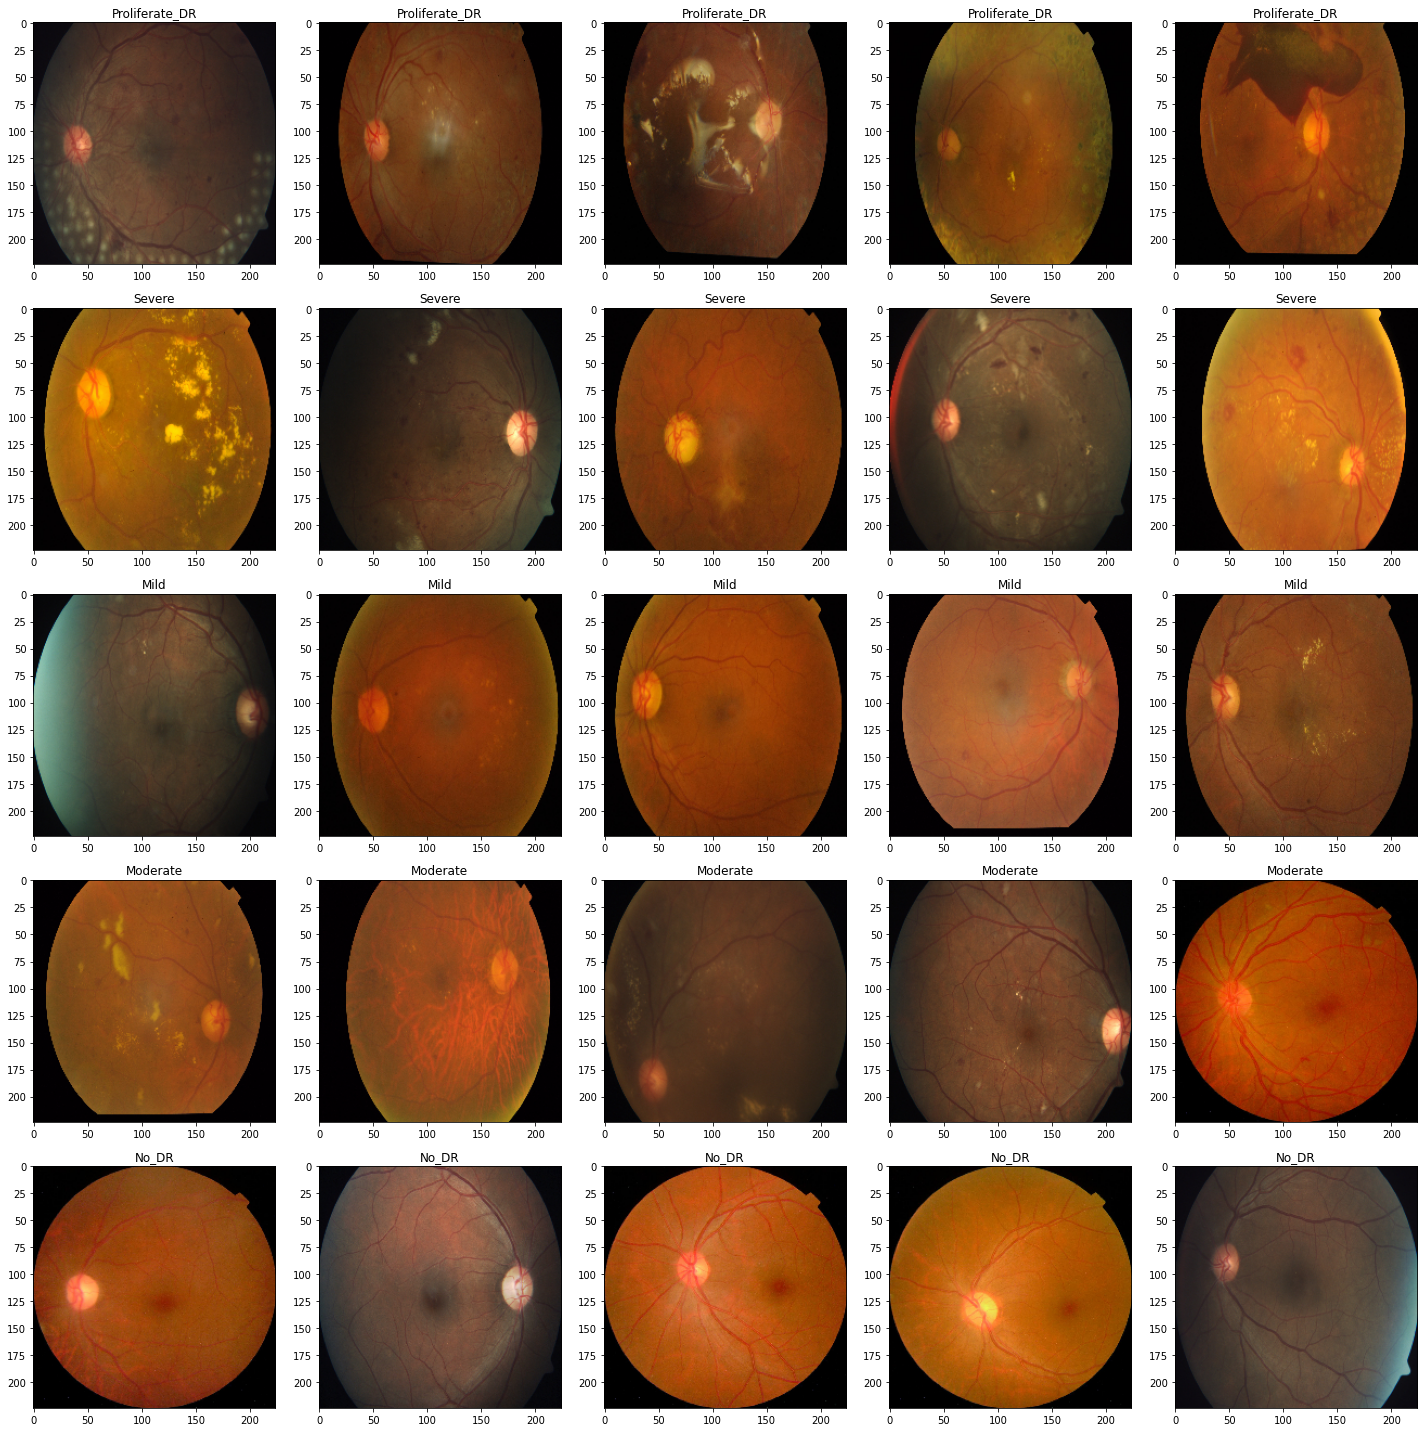

In [18]:
# Visualize 5 images for each class in the dataset

fig, axs = plt.subplots(5, 5, figsize = (20, 20))
count = 0
for i in os.listdir('./train'):
  # get the list of images in a given class
  train_class = os.listdir(os.path.join('train', i))
  # plot 5 images per class
  for j in range(5):
    img = os.path.join('train', i, train_class[j])
    img = PIL.Image.open(img)
    axs[count][j].title.set_text(i)
    axs[count][j].imshow(img)  
  count += 1

fig.tight_layout()


In [21]:
# check the number of images in each class in the training dataset

No_images_per_class = []
Class_name = []
for i in os.listdir('./train'):
  train_class = os.listdir(os.path.join('train', i))
  No_images_per_class.append(len(train_class)) # List holding total number images of each class
  Class_name.append(i) # list holding name of class respective to total number of images in previous list
  print('Number of images in {} = {} \n'.format(i, len(train_class)))

Number of images in Proliferate_DR = 295 

Number of images in Severe = 193 

Number of images in Mild = 370 

Number of images in Moderate = 999 

Number of images in No_DR = 1805 



In [19]:
retina_df = pd.DataFrame({'Image': train,'Labels': label})
retina_df

Image          Labels
0     train/Proliferate_DR/0bf37ca3156a.png  Proliferate_DR
1     train/Proliferate_DR/1638404f385c.png  Proliferate_DR
2     train/Proliferate_DR/1a7e3356b39c.png  Proliferate_DR
3     train/Proliferate_DR/07122e268a1d.png  Proliferate_DR
4     train/Proliferate_DR/0e0fc1d9810c.png  Proliferate_DR
...                                     ...             ...
3657           train/No_DR/7214fc7cbe03.png           No_DR
3658           train/No_DR/70d0392397de.png           No_DR
3659           train/No_DR/7c2e852171c0.png           No_DR
3660           train/No_DR/83038ca49b6d.png           No_DR
3661           train/No_DR/7d0a871c45db.png           No_DR

[3662 rows x 2 columns]

#- Plot a pie chart showing the percentage of samples per class. 

In [22]:
print(No_images_per_class)
print(Class_name)

[295, 193, 370, 999, 1805]
['Proliferate_DR', 'Severe', 'Mild', 'Moderate', 'No_DR']


([<matplotlib.patches.Wedge at 0x7f2c5a759fd0>,
 [Text(1.0649610934471208, 0.27542307355033446, 'Proliferate_DR'),
  Text(0.9392971105311467, 0.74680716262489, 'Severe'),
  Text(0.44459240811066403, 1.0061498847837538, 'Mild'),
  Text(-0.756516646366834, 0.798550288817103, 'Moderate'),
  Text(0.026763929002209728, -1.1997015012511925, 'No_DR')],
 [Text(0.580887869152975, 0.1502307673910915, '8.1%'),
  Text(0.5479233144765022, 0.4356375115311858, '5.3%'),
  Text(0.24250494987854398, 0.5488090280638657, '10.1%'),
  Text(-0.41264544347281856, 0.4355728848093289, '27.3%'),
  Text(0.015612291917955674, -0.6998258757298621, '49.3%')])

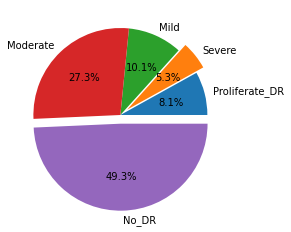

In [23]:
fig1, ax1 = plt.subplots()
explode = (0, 0.1, 0, 0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')
ax1.pie(No_images_per_class, explode= explode,labels = Class_name, autopct = '%1.1f%%')

# From above graph it is clear that data is imbalanced No_DR have 1805 images,whereas Severe contain only 193 images

The more standard approaches would be:

1) The class_weights argument in model.fit, which you can use to make the model learn more from the minority class.

2) Reducing the size of the majority class.

3) Accepting the imbalance. Deep learning can cope with this, it just needs lots more data (the solution to everything, really).

The first two options are really kind of hacks, which may harm your ability to cope with real world (imbalanced) data. Neither really solves the problem of low variability, which is inherent in having too little data. If application to a real world dataset after model training isn't a concern and you just want good results on the data you have, then these options are fine (and much easier than making generators for a single class).

# The third option is the right way to go if you have enough data (as an example, the recent paper from Google about detecting diabetic retinopathy achieved high accuracy in a dataset where positive cases were between 10% and 30%).

If you truly want to generate a variety of augmented images for one class over another, it would probably be easiest to do it in pre-processing. Take the images of the minority class and generate some augmented versions, and just call it all part of your data. Like I say, this is all pretty hacky.

# PERFORM DATA AUGMENTATION AND CREATE DATA GENERATOR

In [24]:
# Shuffle the data and split it into training and testing
retina_df = shuffle(retina_df)
train, test = train_test_split(retina_df, test_size = 0.2)

In [25]:
# Create run-time augmentation on training and test dataset
# For training datagenerator, we add normalization, shear angle, zooming range and horizontal flip
train_datagen = ImageDataGenerator(
        rescale = 1./255,
        shear_range = 0.2,
        vertical_flip= True,
        validation_split = 0.15)

# For test datagenerator, we only normalize the data.
test_datagen = ImageDataGenerator(rescale = 1./255)

In [26]:
# Creating datagenerator for training, validation and test dataset.

train_generator = train_datagen.flow_from_dataframe(
    train,
    directory='./',
    x_col="Image",
    y_col="Labels",
    target_size=(256, 256),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32,
    subset='training')

validation_generator = train_datagen.flow_from_dataframe(
    train,
    directory='./',
    x_col="Image",
    y_col="Labels",
    target_size=(256, 256),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32,
    subset='validation')

test_generator = test_datagen.flow_from_dataframe(
    test,
    directory='./',
    x_col="Image",
    y_col="Labels",
    target_size=(256, 256),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32)

Found 2490 validated image filenames belonging to 5 classes.
Found 439 validated image filenames belonging to 5 classes.
Found 733 validated image filenames belonging to 5 classes.


https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator




In [ ]:
#Bellow details could be changes in datagenerator
tf.keras.preprocessing.image.ImageDataGenerator(
      featurewise_center=False,
      samplewise_center=False,
      featurewise_std_normalization=False,
      samplewise_std_normalization=False,
      zca_whitening=False,
      zca_epsilon=1e-06,
      rotation_range=0,
      width_shift_range=0.0,
      height_shift_range=0.0,
      brightness_range=None,
      shear_range=0.0,
      zoom_range=0.0,
      channel_shift_range=0.0,
      fill_mode="nearest",
      cval=0.0,
      horizontal_flip=False, 
      vertical_flip=False,
      rescale=None,
      preprocessing_function=None,
      data_format=None,
      validation_split=0.3,
      dtype=None)

AlexNet and ResNet-152, both have about 60M parameters but there is about a 10% difference in their top-5 accuracy. But training a ResNet-152 requires a lot of computations (about 10 times more than that of AlexNet) which means more training time and energy required.
Accuracy 95.51% ResNet compared to AlexNet 84.70%

# BUILD RES-BLOCK BASED DEEP LEARNING MODEL

In [40]:
def res_block(X, filter, stage):
  
  # Convolutional_block
  X_copy = X

  f1 , f2, f3 = filter
    
  # Main Path
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_conv_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = MaxPool2D((2,2))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_a')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_conv_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_b')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_c')(X)


  # Short path
  X_copy = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_copy', kernel_initializer= glorot_uniform(seed = 0))(X_copy)
  X_copy = MaxPool2D((2,2))(X_copy)
  X_copy = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_copy')(X_copy)

  # ADD
  X = Add()([X,X_copy])
  X = Activation('relu')(X)
 # Convolution end ------
  # Identity Block 1
  X_copy = X


  # Main Path
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_1_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_a')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_1_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_b')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_1_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_c')(X)

  # ADD
  X = Add()([X,X_copy])
  X = Activation('relu')(X)
 # Identity Block 1 ends here ------------
  # Identity Block 2
  X_copy = X


  # Main Path
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_2_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_a')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_2_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_b')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_2_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_c')(X)

  # ADD
  X = Add()([X,X_copy])
  X = Activation('relu')(X)
# Identity Block 2 ends here ------------
  return X

In [47]:

input_shape = (256,256,3)

#Input tensor shape
X_input = Input(input_shape)

#Zero-padding

X = ZeroPadding2D((3,3))(X_input)

# 1 - stage

X = Conv2D(64, (7,7), strides= (2,2), name = 'conv1', kernel_initializer= glorot_uniform(seed = 0))(X)
X = BatchNormalization(axis =3, name = 'bn_conv1')(X)
X = Activation('relu')(X)
X = MaxPooling2D((3,3), strides= (2,2))(X)

# 2- stage

X = res_block(X, filter= [64,64,256], stage= 2)

# 3- stage

X = res_block(X, filter= [128,128,512], stage= 3)

# 4- stage

X = res_block(X, filter= [256,256,1024], stage= 4)

# 5- stage

# X = res_block(X, filter= [512,512,2048], stage= 5)

# Average Pooling

X = AveragePooling2D((2,2), name = 'Averagea_Pooling')(X)

# Final layer

X = Flatten()(X)
X = Dense(5, activation = 'softmax', name = 'Dense_final', kernel_initializer= glorot_uniform(seed=0))(X)


model = Model( inputs= X_input, outputs = X, name = 'Resnet18')

model.summary()

Model: "Resnet18"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 262, 262, 3)  0           input_5[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 128, 128, 64) 9472        zero_padding2d[0][0]             
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 128, 128, 64) 256         conv1[0][0]                      
___________________________________________________________________________________________

# ResNet50

In [ ]:
#!pip3 install resnet

In [27]:
from keras.applications.resnet50 import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D, BatchNormalization

In [28]:
num_classes = len(train_generator.class_indices)

In [44]:
256/2

128.0

In [45]:
restnet50 = Sequential()

restnet50.add(ResNet50(include_top=False, pooling='avg', weights='imagenet',input_shape=(256,256,3)))
restnet50.add(Flatten())
restnet50.add(BatchNormalization())
restnet50.add(Dense(2048, activation='relu'))
restnet50.add(BatchNormalization())
restnet50.add(Dense(1024, activation='relu'))
restnet50.add(BatchNormalization())
restnet50.add(Dense(512, activation='relu'))
restnet50.add(BatchNormalization())
restnet50.add(Dense(256, activation='relu'))
restnet50.add(BatchNormalization())
restnet50.add(Dense(128, activation='relu'))
restnet50.add(BatchNormalization())
restnet50.add(Dense(num_classes, activation='softmax'))

restnet50.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
flatten_3 (Flatten)          (None, 2048)              0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 2048)              8192      
_________________________________________________________________
dense_8 (Dense)              (None, 2048)              4196352   
_________________________________________________________________
batch_normalization_10 (Batc (None, 2048)              8192      
_________________________________________________________________
dense_9 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
batch_normalization_11 (Batc (None, 1024)             

# COMPILE AND TRAIN DEEP LEARNING MODEL

In [48]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics= ['accuracy'])


In [49]:
#ResNet50
restnet50.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics= ['accuracy'])

In [50]:
#using early stopping to exit training if validation loss is not decreasing even after certain epochs (patience)
earlystopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

#save the best model with lower validation loss
checkpointer = ModelCheckpoint(filepath="My_weights.hdf5", verbose=1, save_best_only=True)

Application to a real world dataset after model training isn't a concern and we just want good results on the data we have, so we are using the class_weights argument in model.fit, which you can use to make the model learn more from the minority class.

In [51]:
#groupby the data by delivery type
Grouped_data = train.groupby("Image")["Labels"].sum()
#Grouped_data = retina_df.groupby("Image")["Labels"].sum()

In [52]:
Grouped_data = Grouped_data.to_frame()
Grouped_data = Grouped_data.reset_index()

In [53]:
Grouped_data

Image  Labels
0       train/Mild/0024cdab0c1e.png    Mild
1       train/Mild/00cb6555d108.png    Mild
2       train/Mild/0124dffecf29.png    Mild
3       train/Mild/03e25101e8e8.png    Mild
4       train/Mild/059bc89df7f4.png    Mild
...                             ...     ...
2924  train/Severe/f901d460517c.png  Severe
2925  train/Severe/f9156aeffc5e.png  Severe
2926  train/Severe/fb61230b99dd.png  Severe
2927  train/Severe/fcc6aa6755e6.png  Severe
2928  train/Severe/fda39982a810.png  Severe

[2929 rows x 2 columns]

In [54]:
# Grouped data of train used to balance the weight data generation
from sklearn.utils import class_weight
class_weight = class_weight.compute_class_weight('balanced'
                                               ,np.unique(Grouped_data['Labels'])
                                               ,Grouped_data['Labels'])

In [55]:
#Sklear makes array of weight balance but keras use dictionary to feed weight, so convert array to dictionary
class_weight = dict(enumerate(class_weight.flatten(), 0))

In [56]:
print(No_images_per_class)
print(Class_name)
print(type(class_weight))
print("class_weight sequence",np.unique(Grouped_data['Labels']))

print(class_weight)

[295, 193, 370, 999, 1805]
['Proliferate_DR', 'Severe', 'Mild', 'Moderate', 'No_DR']
<class 'dict'>
class_weight sequence ['Mild' 'Moderate' 'No_DR' 'Proliferate_DR' 'Severe']
{0: 1.9461794019933554, 1: 0.7405815423514539, 2: 0.4065232477446218, 3: 2.4206611570247936, 4: 3.803896103896104}


In [57]:
# For own ResNet18
#history = model.fit(train_generator, steps_per_epoch = train_generator.n // 32, epochs = 40, validation_data= validation_generator, validation_steps= validation_generator.n // 32, callbacks=[checkpointer , earlystopping], class_weight=class_weight)

#For ResNet50 compiled model

history = restnet50.fit(train_generator, steps_per_epoch = train_generator.n // 32, epochs = 25, validation_data= validation_generator, validation_steps= validation_generator.n // 32, callbacks=[checkpointer , earlystopping], class_weight=class_weight)

Epoch 1/25
77/77 [==============================] - 964s 12s/step - loss: 1.8232 - accuracy: 0.4415 - val_loss: 7.2561 - val_accuracy: 0.1322

Epoch 00001: val_loss improved from inf to 7.25607, saving model to My_weights.hdf5
Epoch 2/25
77/77 [==============================] - 62s 797ms/step - loss: 1.3619 - accuracy: 0.5255 - val_loss: 1.7256 - val_accuracy: 0.3005

Epoch 00002: val_loss improved from 7.25607 to 1.72559, saving model to My_weights.hdf5
Epoch 3/25
77/77 [==============================] - 62s 803ms/step - loss: 1.2390 - accuracy: 0.6078 - val_loss: 2.6121 - val_accuracy: 0.0673

Epoch 00003: val_loss did not improve from 1.72559
Epoch 4/25
77/77 [==============================] - 61s 791ms/step - loss: 1.2789 - accuracy: 0.5860 - val_loss: 2.9776 - val_accuracy: 0.4399

Epoch 00004: val_loss did not improve from 1.72559
Epoch 5/25
77/77 [==============================] - 61s 789ms/step - loss: 1.2611 - accuracy: 0.5622 - val_loss: 3.0169 - val_accuracy: 0.0649

Epoch 0

In [79]:
# Play an audio beep. Any audio URL will do.
from google.colab import output
output.eval_js('new Audio("https://upload.wikimedia.org/wikipedia/commons/0/05/Beep-09.ogg").play()')
output.eval_js('new Audio("https://upload.wikimedia.org/wikipedia/commons/0/05/Beep-09.ogg").play()')
output.eval_js('new Audio("https://upload.wikimedia.org/wikipedia/commons/0/05/Beep-09.ogg").play()')
output.eval_js('new Audio("https://upload.wikimedia.org/wikipedia/commons/0/05/Beep-09.ogg").play()')
output.eval_js('new Audio("https://upload.wikimedia.org/wikipedia/commons/0/05/Beep-09.ogg").play()')

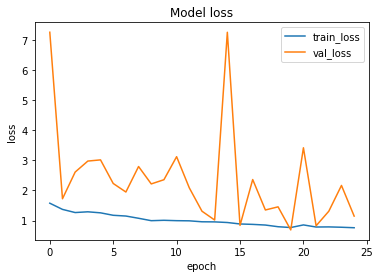

In [58]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'], loc = 'upper right')
plt.show()


#*ASSESS THE PERFORMANCE OF THE TRAINED MODEL*

In [ ]:
model.load_weights("/content/drive/MyDrive/AI_DataSet/Dibetic_Retinopathy/My_weights.hdf5")

In [60]:
# Previous model
model.load_weights("/content/drive/MyDrive/AI_DataSet/Dibetic_Retinopathy/retina_weights.hdf5")

In [61]:
# Evaluate the performance of the model
evaluate = model.evaluate(test_generator, steps = test_generator.n // 32, verbose =1)

22/22 [==============================] - 4s 124ms/step - loss: 0.4456 - accuracy: 0.8553


In [59]:
# Evaluate the performance of the model
evaluateres = restnet50.evaluate(test_generator, steps = test_generator.n // 32, verbose =1)

22/22 [==============================] - 245s 12s/step - loss: 0.8643 - accuracy: 0.7017


In [62]:
#print('Accuracy Test : {}'.format(evaluate[1])) # Previous 20 epoch 1 resnet less
print('ResNet50 Accuracy Test : {}'.format(evaluateres[1]))#
print('Retina Trained model Accuracy Test : {}'.format(evaluate[1]))

ResNet50 Accuracy Test : 0.7017045617103577
Retina Trained model Accuracy Test : 0.8394886255264282


In [63]:
# Assigning label names to the corresponding indexes
labels = {0: 'Mild', 1: 'Moderate', 2: 'No_DR', 3:'Proliferate_DR', 4: 'Severe'}

In [ ]:
#!pip install opencv-python

In [64]:
# Loading images and their predictions 

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import cv2

prediction = []
original = []
image = []
count = 0

for item in range(len(test)):
  # code to open the image
  img= PIL.Image.open(test['Image'].tolist()[item])
  # resizing the image to (256,256)
  img = img.resize((256,256))
  # appending image to the image list
  image.append(img)
  # converting image to array
  img = np.asarray(img, dtype= np.float32)
  # normalizing the image
  img = img / 255
  # reshaping the image in to a 4D array
  img = img.reshape(-1,256,256,3)
  # making prediction of the model
  predict = model.predict(img)
  # getting the index corresponding to the highest value in the prediction
  predict = np.argmax(predict)
  # appending the predicted class to the list
  prediction.append(labels[predict])
  # appending original class to the list
  original.append(test['Labels'].tolist()[item])


In [65]:
labels

{0: 'Mild', 1: 'Moderate', 2: 'No_DR', 3: 'Proliferate_DR', 4: 'Severe'}

In [66]:
# Getting the test accuracy 
score = accuracy_score(original,prediction)
print("Test Accuracy : {}".format(score))

Test Accuracy : 0.8308321964529332


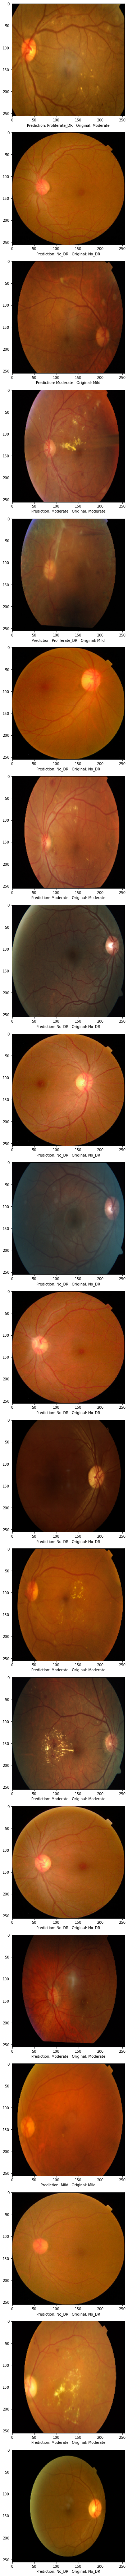

In [67]:
# Visualizing the results
import random
fig=plt.figure(figsize = (100,100))
for i in range(20):
    j = random.randint(0,len(image))
    fig.add_subplot(20, 1, i+1)
    plt.xlabel("Prediction: " + prediction[j] +"   Original: " + original[j])
    plt.imshow(image[j])
fig.tight_layout()
plt.show()

# Classification report and Confusion matrix


In [68]:
# Printout the classification report
print(classification_report(np.asarray(original), np.asarray(prediction)))

                precision    recall  f1-score   support

          Mild       0.76      0.49      0.60        69
      Moderate       0.73      0.84      0.78       208
         No_DR       0.95      0.98      0.97       364
Proliferate_DR       0.53      0.60      0.57        53
        Severe       0.79      0.28      0.42        39

      accuracy                           0.83       733
     macro avg       0.75      0.64      0.67       733
  weighted avg       0.83      0.83      0.82       733



# Highest f1 score is for No_DR because No_DR images have more images as representative and Severe case images are less show lowest f1-score

Text(0.5, 1.0, 'Confusion_matrix')

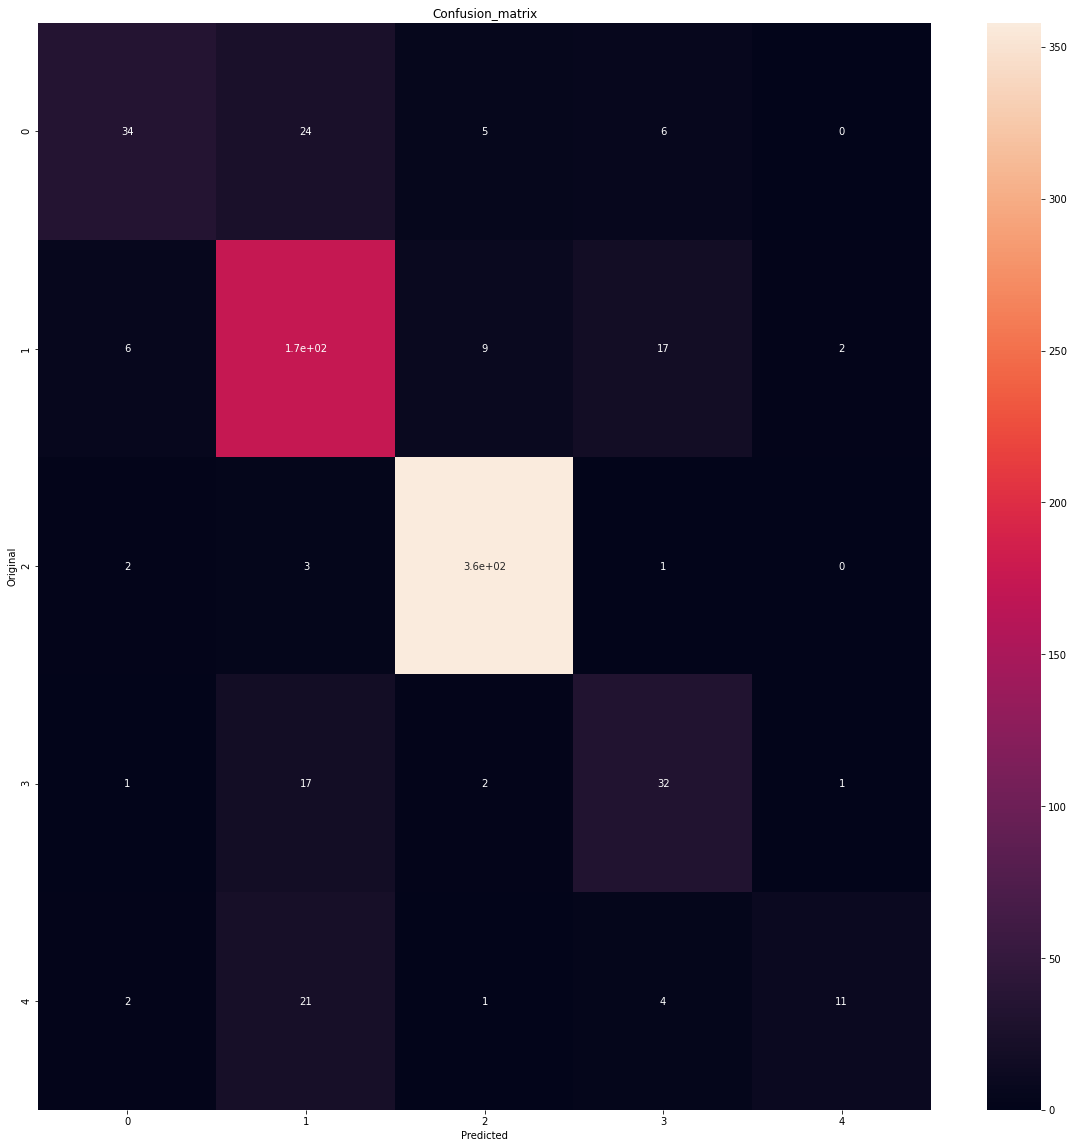

In [69]:
# plot the confusion matrix
plt.figure(figsize = (20,20))
cm = confusion_matrix(np.asarray(original), np.asarray(prediction))
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax)

ax.set_xlabel('Predicted')
ax.set_ylabel('Original')
ax.set_title('Confusion_matrix')


 - Try a different optimizer and retrain the model 
 - Change the value of patience in early stopping


- Try optimizers like adam, ndam
- Change the value of patience to 25 